## Importing dependencies

In [30]:
import json
import time
import os

import pandas as pd
import numpy as np
import seaborn as sn

from setup_nyc_payroll import download_data, read_from_file

## Reading payroll data

In [31]:
FILENAME = 'nyc_payroll.json'
payroll_data = read_from_file(FILENAME)

## Filtering out independent variables


<AxesSubplot:>

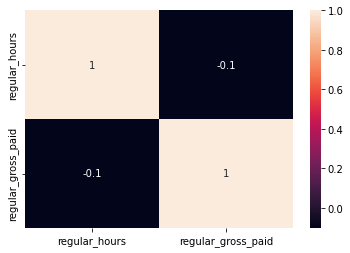

In [39]:
# We are using work_location, regular_hours, and regular_gross_paid to predict title_description

df = pd.DataFrame(data=payroll_data)
df.head
dropped_columns = ['fiscal_year', 'last_name', 'first_name', 'mid_init', 'payroll_number', 'pay_basis', 'leave_status_as_of_july_31', 'total_other_pay', 'base_salary']
df = df.drop(dropped_columns, axis=1)



# Convert columns to numeric and removes negative gross paid
df[["regular_hours", "regular_gross_paid"]] = df[["regular_hours", "regular_gross_paid"]].apply(pd.to_numeric)
df = df[df.agency_start_date != "9999-12-31T00:00:00.000"]
df = df[(df[["regular_gross_paid"]] > 0).all(1)]
df = df.dropna() 


df.describe()
df.head
sn.heatmap(df.corr(), annot=True)

## Days Worked feature

In [33]:
# TODO: Using agency_start_date to make a feature calculating how long they worked in that position
# However for now dropping that feature
df = df.drop(["agency_start_date"], axis=1)

## Setting up X and Y variables

In [34]:
# Setting up X and Y
X = df.drop(["title_description"], axis=1)
Y = df.title_description


In [35]:
X.describe()

,regular_hours,regular_gross_paid
count,300226.000000,300226.000000
mean,1113.764101,74280.546265
std,952.544703,31525.145021
min,0.000000,4.590000
25%,0.000000,47998.470000
50%,1820.000000,73132.850000
75%,2080.000000,95569.830000
max,4160.000000,359818.400000


In [36]:
X.head

<bound method NDFrame.head of                            agency_name work_location_borough  regular_hours  \
0       OFFICE OF EMERGENCY MANAGEMENT              BROOKLYN        1820.00   
1       OFFICE OF EMERGENCY MANAGEMENT              BROOKLYN        1820.00   
2       OFFICE OF EMERGENCY MANAGEMENT              BROOKLYN        1820.00   
3       OFFICE OF EMERGENCY MANAGEMENT              BROOKLYN        1820.00   
4       OFFICE OF EMERGENCY MANAGEMENT              BROOKLYN        1820.00   
...                                ...                   ...            ...   
300354           NYC HOUSING AUTHORITY                QUEENS          17.15   
300355           NYC HOUSING AUTHORITY             MANHATTAN          40.00   
300365           NYC HOUSING AUTHORITY             MANHATTAN          15.00   
300367           NYC HOUSING AUTHORITY             MANHATTAN          17.15   
300368           NYC HOUSING AUTHORITY             MANHATTAN          17.15   

        regular_gross

## Encoding categorical data

In [37]:
# We have two categorical data the work_location and title_description